In [12]:
import os, sys

import numpy as np
import tqdm
import torch

sys.path.append('../../../')

%load_ext autoreload
%autoreload 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

app_root = '../../../../'
test_name = 'test3'
datasets_path = os.path.join(app_root, 'data')
model_dir_path = os.path.join(app_root, 'model', test_name)

datasets_paths = {}
for lang in os.listdir(datasets_path):
    dataset_lang_path = os.path.join(datasets_path, lang)
    if os.path.isdir(dataset_lang_path):
        datasets_paths[lang] = {}
        for d_type in os.listdir(dataset_lang_path):
            d_name = d_type.split('.')[0]
            datasets_paths[lang][d_name] = os.path.join(dataset_lang_path, d_type)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
test_input = {}

test_input['EN'] = {
    "lemmas": ["it","also","recommend","that","the","authority","take","appropriate","measure","to","meet","the","specific","educational","need","of","Roma","child","."],
    "predicates": ["_","_","PROPOSE","_","_","_","CARRY-OUT-ACTION","_","_","_","SATISFY_FULFILL","_","_","_","_","_","_","_","_"], 
    "words": [
        "It","also","recommends","that","the","authorities","take","appropriate","measures","to",
        "meet","the","specific","educational","needs","of","Roma","children","."]
}

test_input['ES'] = {
    "lemmas": ["recomendar","asimismo","que","el","autoridad","adoptar","el","medida","oportuno","para","atender","a","el","necesidad","educativo","especifico","de","el","ni\u00f1o","gitanos","."],
    "predicates": ["PROPOSE","_","_","_","_","CARRY-OUT-ACTION","_","_","_","_","SATISFY_FULFILL","_","_","_","_","_","_","_","_","_","_"], 
    "words": ["Recomienda","asimismo","que","las","autoridades","adopten","las","medidas","oportunas","para","atender","a","las","necesidades","educativas","espec\u00edficas","de","los","ni\u00f1os","gitanos","."]
}

test_input['FR'] = {
    "lemmas": ["il","lui","recommander","\u00e9galement","de","prendre","le","mesure","n\u00e9cessaire","pour","r\u00e9pondre","\u00e0","le","besoin","pr\u00e9cis","de","le","enfant","rom","en","mati\u00e8re","de","\u00e9ducation","."],
    "predicates": ["_","_","PROPOSE","_","_","CARRY-OUT-ACTION","_","_","_","_","SATISFY_FULFILL","_","_","_","_","_","_","_","_","_","_","_","_","_"], 
    "words": ["Il","leur","recommande","\u00e9galement","de","prendre","les","mesures","n\u00e9cessaires","pour","r\u00e9pondre","\u00e0","les","besoins","pr\u00e9cis","de","les","enfants","roms","en","mati\u00e8re","d'","\u00e9ducation","."]
}

# Final model testing

## EN

In [4]:
lang = 'EN'

In [5]:
from stud.modelsTests.model_total.final_model import FinalModel

In [6]:
fm_total = FinalModel(language=lang, device=device, model_type = 0)

print(fm_total.predict(test_input[lang]))

{'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}


In [7]:
fm_total = FinalModel(language=lang, device=device, model_type = 1)

print(fm_total.predict(test_input[lang]))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}


In [8]:
fm_total = FinalModel(language=lang, device=device, model_type = 2)

print(fm_total.predict(test_input[lang]))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}


## ES

In [9]:
lang = 'ES'

In [10]:
from stud.modelsTests.model_total.final_model import FinalModel

In [11]:
fm_total = FinalModel(language=lang, device=device, model_type = 0)

print(fm_total.predict(test_input[lang]))

{'roles': {0: ['_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', '_', '_', '_', 'agent', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


In [12]:
fm_total = FinalModel(language=lang, device=device, model_type = 1)

print(fm_total.predict(test_input[lang]))

{'predicates': ['PROPOSE', '_', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', '_', 'FOCUS', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {0: ['_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', '_', '_', '_', 'agent', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


In [13]:
fm_total = FinalModel(language=lang, device=device, model_type = 2)

print(fm_total.predict(test_input[lang]))

{'predicates': ['PROPOSE', '_', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {0: ['_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', '_', '_', '_', 'agent', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


## FR

In [14]:
lang = 'FR'

In [15]:
from stud.modelsTests.model_total.final_model import FinalModel

In [16]:
fm_total = FinalModel(language=lang, device=device, model_type = 0)

print(fm_total.predict(test_input[lang]))

{'roles': {2: ['agent', 'recipient', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', 'agent', '_', '_', '_', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


In [17]:
fm_total = FinalModel(language=lang, device=device, model_type = 1)

print(fm_total.predict(test_input[lang]))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', 'recipient', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', 'agent', '_', '_', '_', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


In [18]:
fm_total = FinalModel(language=lang, device=device, model_type = 2)

print(fm_total.predict(test_input[lang]))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', 'recipient', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 5: ['_', 'agent', '_', '_', '_', '_', '_', 'patient', '_', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']}}


# Evaluation part

In [14]:
from stud.modelsTests.utils.print_infos import *

from stud.modelsTests.utils.Trainer_aic_transformer_simple import Trainer_aic_transformer_simple
from stud.modelsTests.utils.Trainer_pid_transformer_simple import Trainer_pid_transformer_simple

from stud.modelsTests.model_pred_iden_dis_part.Model_pid_transformer_simple import PredIdenDisModel
from stud.modelsTests.model_arg_iden_class_part.Model_aic_transformer_simple import ArgIdenClassModel

from stud.modelsTests.dataset.SRLDataset_transformer import SRLDataset_transformer
from torch.utils.data import DataLoader

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
num_workers = 4

In [15]:
trainer_aic = Trainer_aic_transformer_simple()
trainer_pid = Trainer_pid_transformer_simple()

In [54]:
def cf_model34(lang, device, root_path):
    aic = ArgIdenClassModel(
        language=lang,
        device=device,
        root_path=app_root,
    )
    dataset_dev = SRLDataset_transformer(datasets_paths[lang]['dev'], 
                                        tokenizer = aic.hparams['transformer_name'],
                                        labels = aic.dataset.labels)
    dataloader_dev = DataLoader(
        dataset_dev,
        batch_size=aic.hparams['batch_size'],
        collate_fn=dataset_dev.create_collate_fn(),
        num_workers=num_workers,
        shuffle=False,
    )

    val_labels, val_predictions, valid_loss = trainer_aic.compute_arg_iden_class_validation_predictions(aic.model, dataloader_dev, device)

    val_labels_formatted = [ role_val for roles in val_labels.values() for role_list in roles['roles'].values() for role_val in role_list ]
    val_predictions_formatted = [ role_val for roles in val_predictions.values() for role_list in roles['roles'].values() for role_val in role_list ]

    val_labels_iden_formatted = [1 if role_val > 0 else 0 for roles in val_labels.values() for role_list in roles['roles'].values() for role_val in role_list ]
    val_predictions_iden_formatted = [1 if role_val > 0 else 0 for roles in val_predictions.values() for role_list in roles['roles'].values() for role_val in role_list ]

    plot_confusion_matrix(val_labels_formatted, val_predictions_formatted, display_labels=aic.dataset.labels['id_to_roles'])

## EN

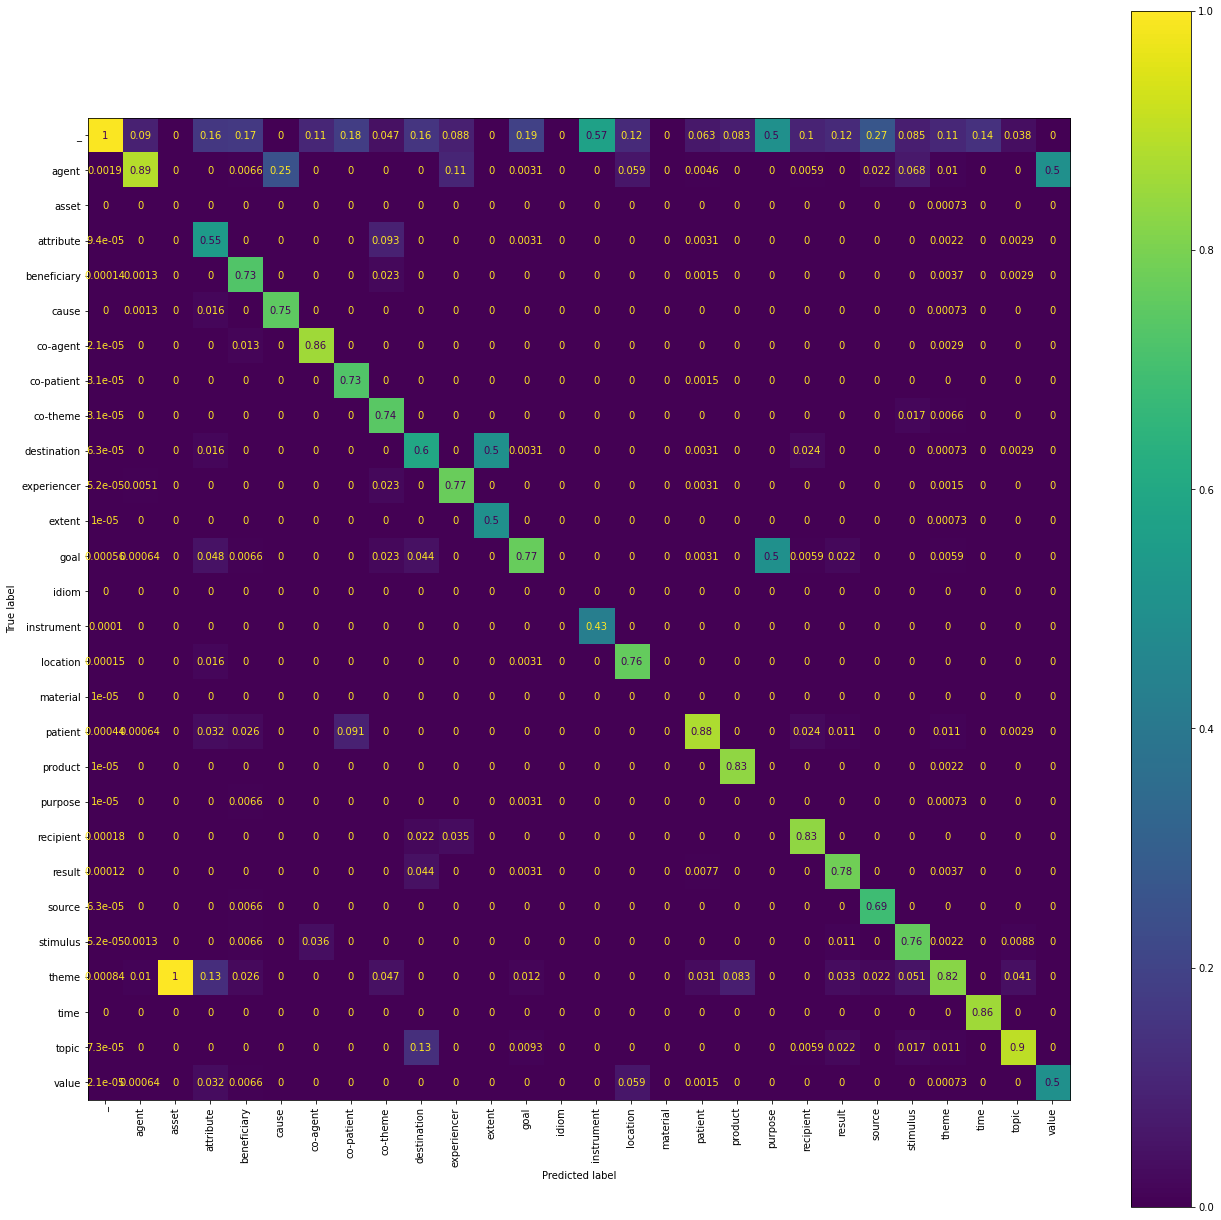

In [23]:
cf_model34('EN', device, app_root)

# ES

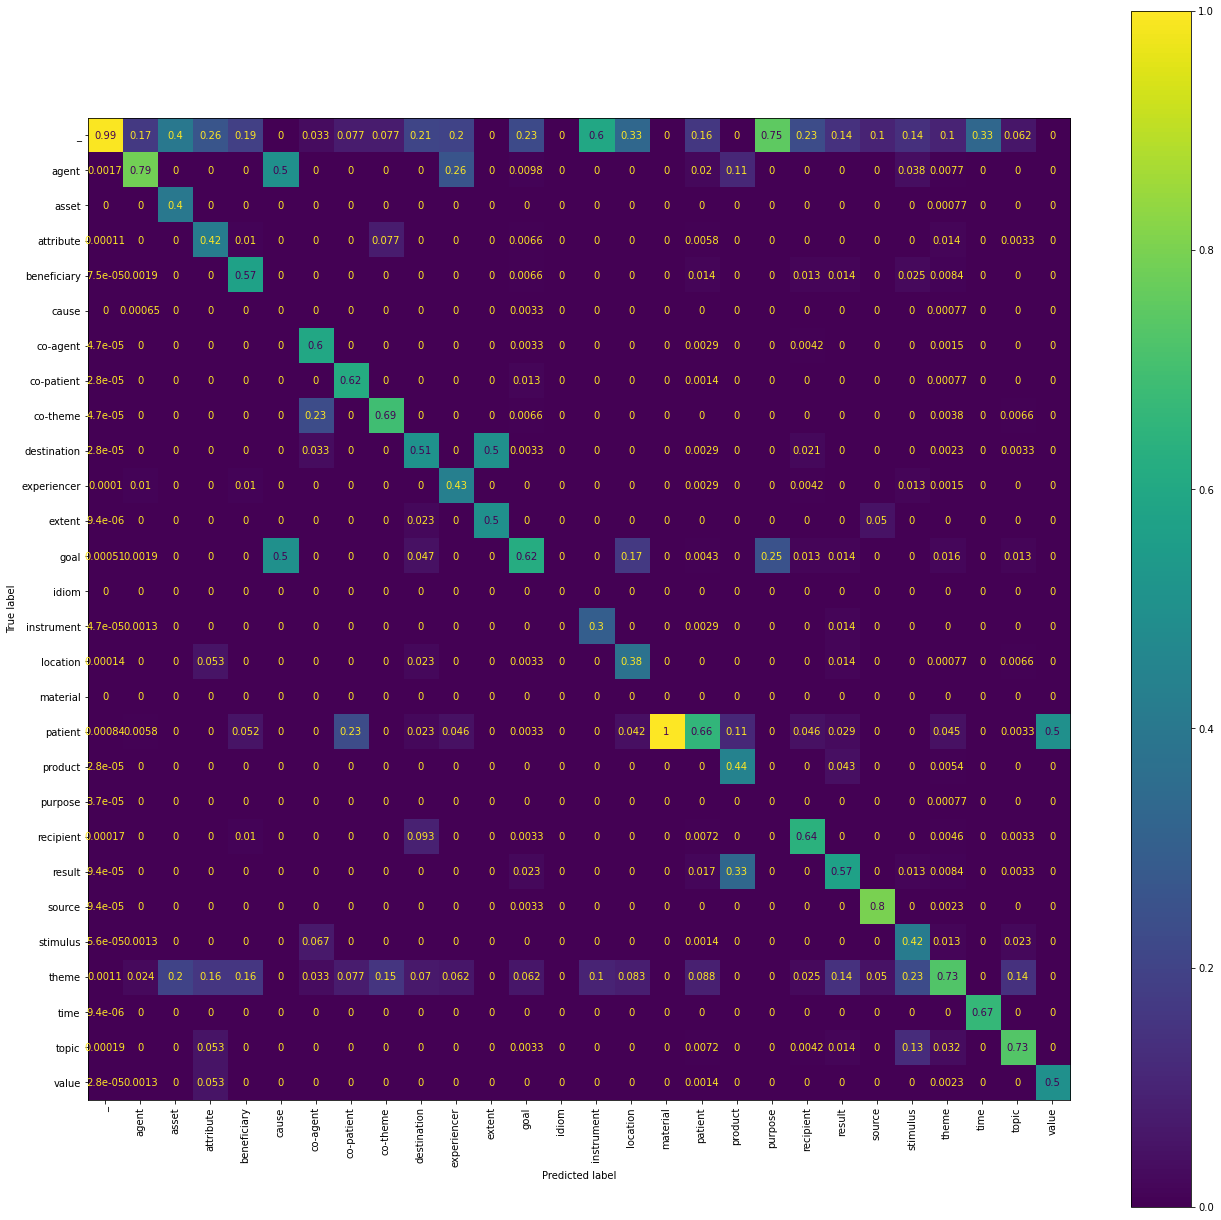

In [10]:
cf_model34('ES', device, app_root)

# FR

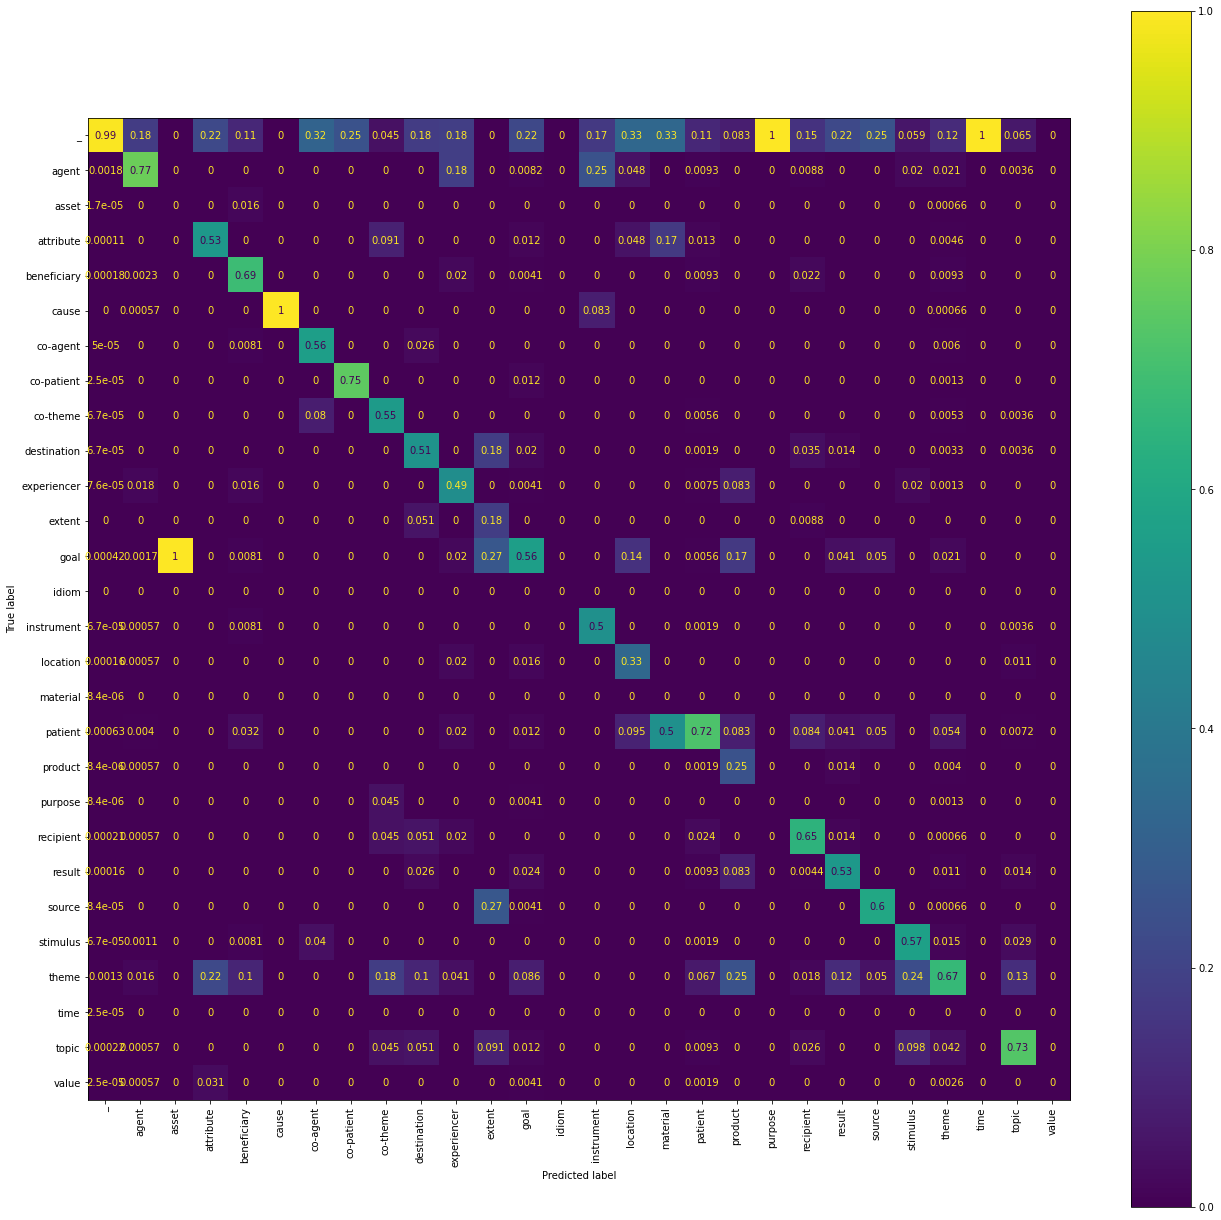

In [11]:
cf_model34('FR', device, app_root)